In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
backup_df = df

In [5]:
df.shape

(21613, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Columns:
1. id - Unique identifier for each property
2. date - Date of property listing
3. price - Property price in currency
4. bedrooms - Number of bedrooms
5. bathrooms - Number of bathrooms
6. sqft_living - Living area size in square feet
7. sqft_lot - Total lot size in square feet
8. floors - Number of floors
9. waterfront - Indicates if property has waterfront view (0 for no, 1 for yes).
10. view - Quality level of property view (0 to 4)
11. condition - Overall condition rating (1 to 5)
12. grade - Overall grade rating (1 to 13)
13. sqft_above - Living area above ground level in square feet
14. sqft_basement - Basement area in square feet
15. yr_built - Year property was built
16. yr_renovated - Year property was last renovated (0 if never)
17. zipcode - Property location zip code
18. lat - Latitude coordinate of property location
19. long - Longitude coordinate of property location
20. sqft_living15 - Living area size of 15 nearest properties in square feet
21. sqft_lot15 - Lot size of 15 nearest properties in square feet

In [7]:
df.isna().sum().sum()

np.int64(0)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns=['id'], inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df[['date']].head(10)

,date
0,20141013T000000
1,20141209T000000
2,20150225T000000
3,20141209T000000
4,20150218T000000
5,20140512T000000
6,20140627T000000
7,20150115T000000
8,20150415T000000
9,20150312T000000


In [11]:
df['date'] = pd.to_datetime(df['date'])

In [12]:
df[['date']].head(10)

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18
5,2014-05-12
6,2014-06-27
7,2015-01-15
8,2015-04-15
9,2015-03-12


In [13]:
df['date'].dt.year.value_counts()

date
2014    14633
2015     6980
Name: count, dtype: int64

In [14]:
df['date'].dt.month.value_counts().sort_index()

date
1      978
2     1250
3     1875
4     2231
5     2414
6     2180
7     2211
8     1940
9     1774
10    1878
11    1411
12    1471
Name: count, dtype: int64

In [15]:
df['listed_year'] = df['date'].dt.year
df['listed_month'] = df['date'].dt.month

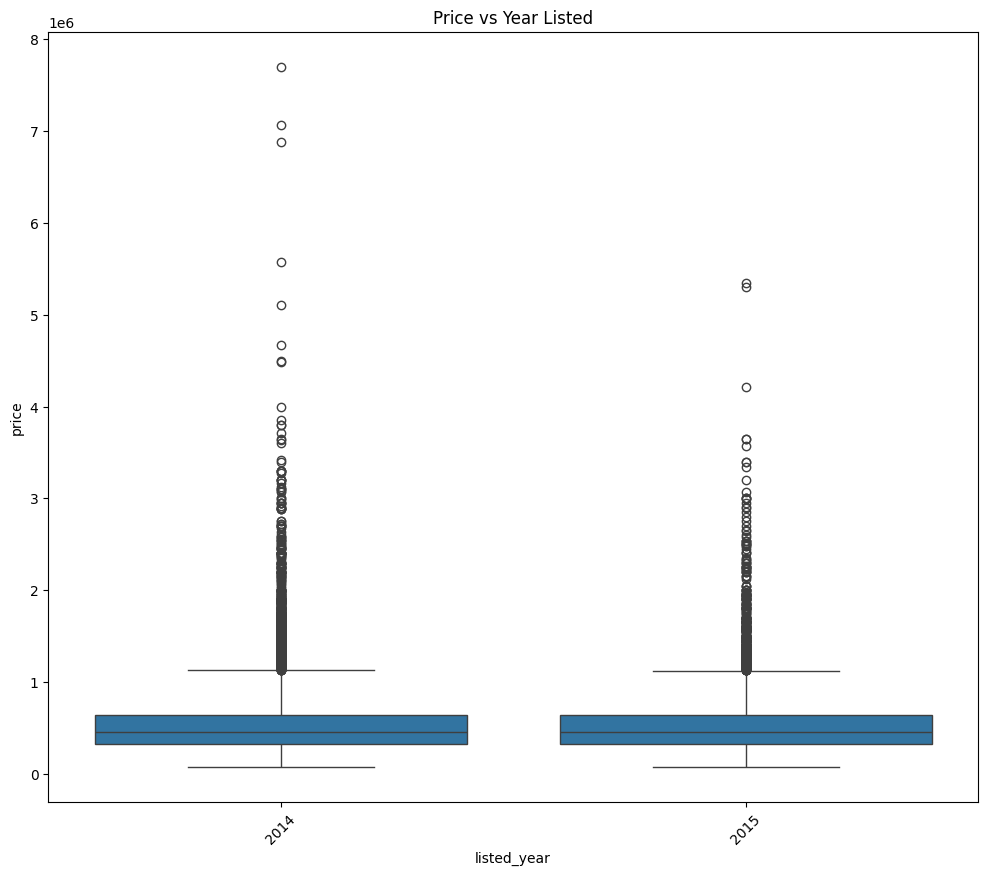

In [16]:
plt.figure(figsize=(12,10))
sns.boxplot(x='listed_year', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price vs Year Listed")
plt.show()

In [17]:
df.groupby('listed_year', as_index=False)['price'].median()

,listed_year,price
0,2014,450000.0
1,2015,450500.0


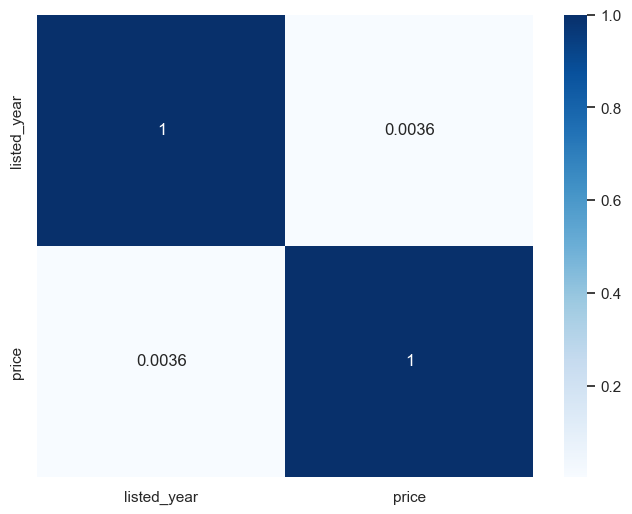

In [18]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df[['listed_year', 'price']].corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: listed_year (that shows the year when property was listed) is not adding any predictive value hence can be dropped.

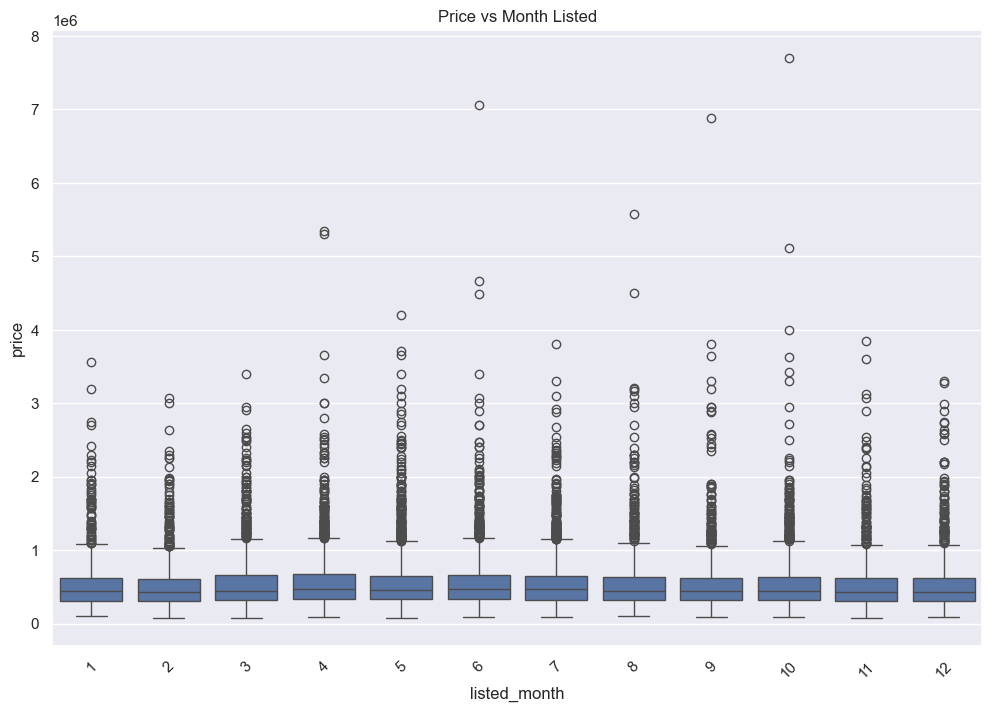

In [19]:
plt.figure(figsize=(12,8))
sns.boxplot(x='listed_month', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price vs Month Listed")
plt.show()

In [20]:
df.groupby('listed_month', as_index=False)['price'].median()

,listed_month,price
0,1,438500.0
1,2,425545.0
2,3,450000.0
3,4,476500.0
4,5,462000.0
5,6,465000.0
6,7,465000.0
7,8,442100.0
8,9,450000.0
9,10,446900.0


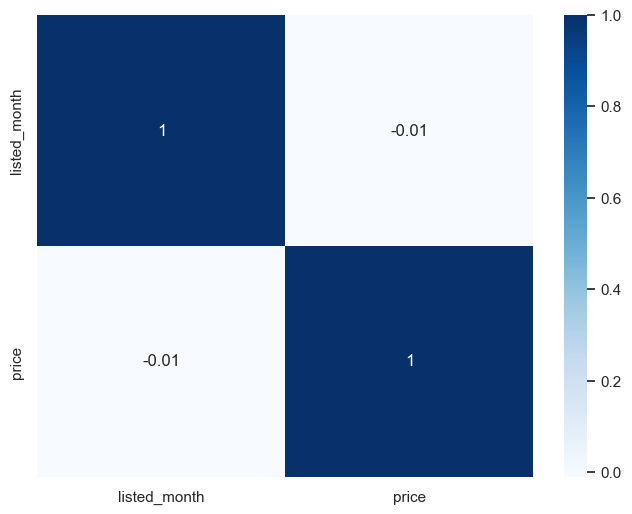

In [21]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df[['listed_month', 'price']].corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: listed_month (shows the month when the property was listed) shows weak correlation but encoding months into season can bring a deeper insight.

In [22]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,listed_year,listed_month
0,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [23]:
def season(month):
    if month <= 4:
        return 'Spring'
    
    elif month <= 8:
        return 'Summer'

    else:
        return 'Fall'


df['listed_season'] = df['listed_month'].apply(season)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,listed_year,listed_month,listed_season
0,2014-10-13,231300.0,2,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,Fall
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,Fall
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,Spring
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,Fall
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,Spring


In [24]:
df.drop(columns=['listed_year', 'listed_month', 'date'], inplace=True)

In [25]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,listed_season
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,Fall
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Spring
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,Fall
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,Spring


In [26]:
dfnums = df.select_dtypes(include='number')

In [27]:
dfnums.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


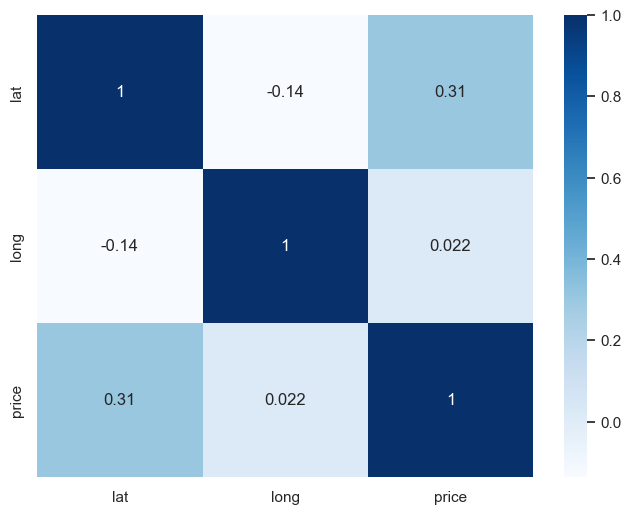

In [28]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(8,6))
sns.heatmap(df[['lat', 'long', 'price']].corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: while lat has a moderate positive correlation with price long has negligible correlation, instead using zipcode to capture regional price differences would be a better approach.

In [29]:
df.drop(columns=['lat', 'long'], inplace=True)

In [30]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,listed_season
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,Fall
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,Spring
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,Fall
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,Spring


In [31]:
df['zipcode'] = df['zipcode'].astype('object')
df['zipcode'].dtype

dtype('O')

In [32]:
df['yr_renovated'].nunique()

70

In [33]:
def renovated(year):
    if year == 0:
        return "No"
    else:
        return "Yes"


df['renovated'] = df['yr_renovated'].apply(renovated)
df.drop(columns=['yr_renovated'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,listed_season,renovated
0,231300.0,2,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650,Fall,No
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639,Fall,Yes
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062,Spring,No
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000,Fall,No
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503,Spring,No


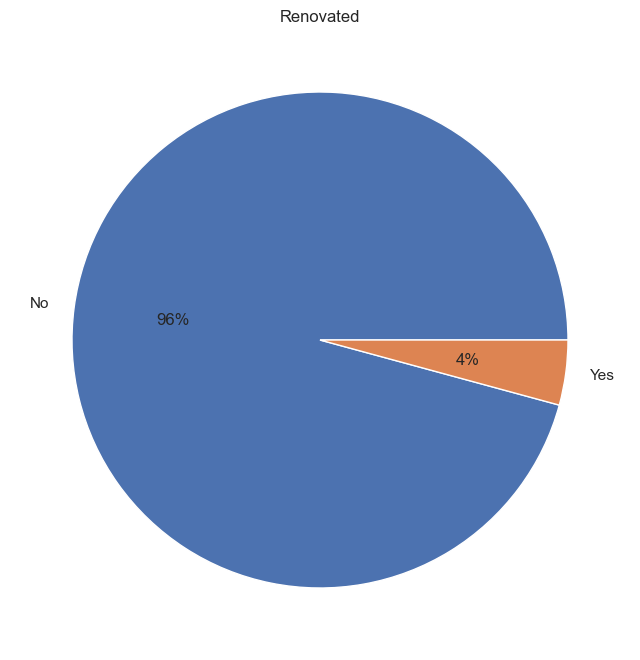

In [34]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,10))
plt.pie(df['renovated'].value_counts(), labels=df['renovated'].unique(), autopct='%1.0f%%')
plt.title("Renovated")
plt.show()

In [35]:
dfsqft = df[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'price']]

In [36]:
dfsqft.head()

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,price
0,1180,5650,1180,0,1340,5650,231300.0
1,2570,7242,2170,400,1690,7639,538000.0
2,770,10000,770,0,2720,8062,180000.0
3,1960,5000,1050,910,1360,5000,604000.0
4,1680,8080,1680,0,1800,7503,510000.0


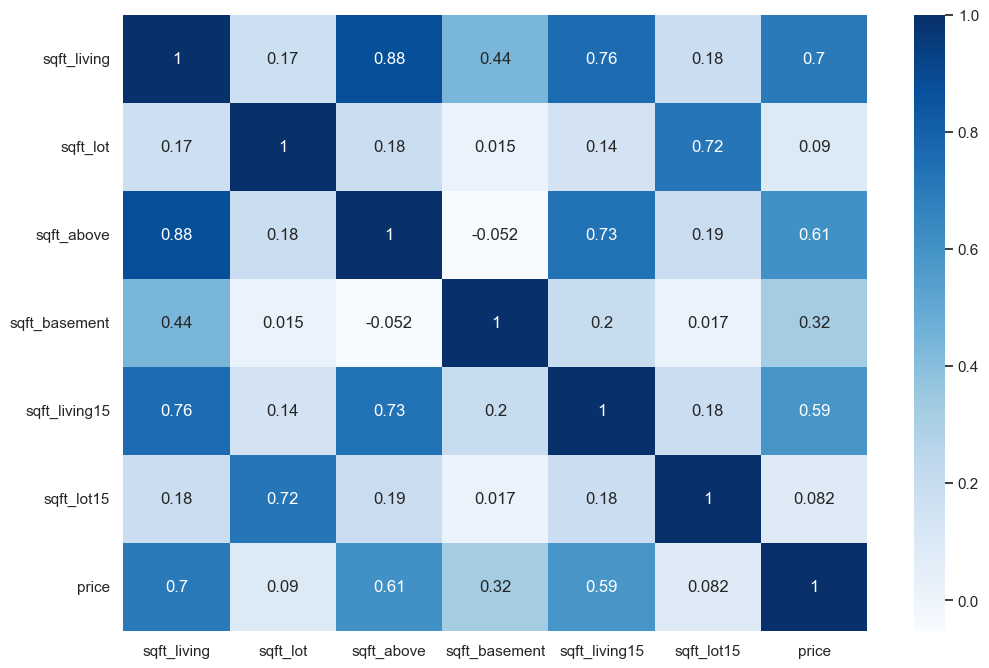

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(dfsqft.corr(), annot=True, cmap='Blues')
plt.show()

##### sqft_lot and sqft_lot15 do not add any significant predictive power it is better to drop and reduce dimensionality

In [38]:
dfsqft = dfsqft.drop(columns=['sqft_lot', 'sqft_lot15'])

In [39]:
dfsqft.head()

,sqft_living,sqft_above,sqft_basement,sqft_living15,price
0,1180,1180,0,1340,231300.0
1,2570,2170,400,1690,538000.0
2,770,770,0,2720,180000.0
3,1960,1050,910,1360,604000.0
4,1680,1680,0,1800,510000.0


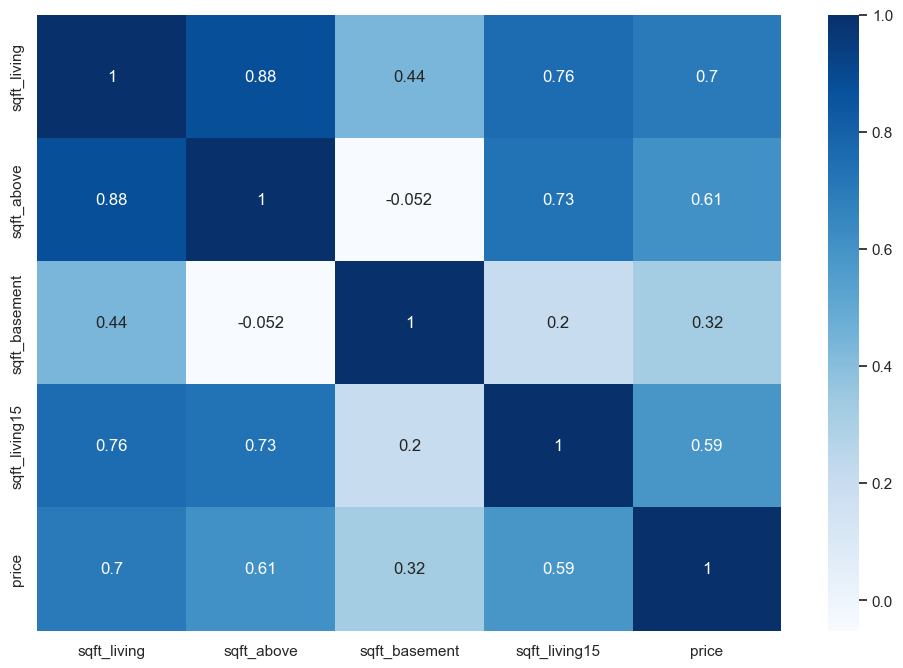

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(dfsqft.corr(), annot=True, cmap='Blues')
plt.show()

##### Conclusion: 
- sqft_living15 is moderately correlated with price but highly collinear with sqft_living, can be dropped.
- sqft_above overlaps heavily with sqft_living so keeping both risks multicollinearity, can be dropped.
- sqft_living is the strongest predictor of price.
- sqft_basement is moderately correlated with price and minorly correlated with others, can be dropped after initial model testing.

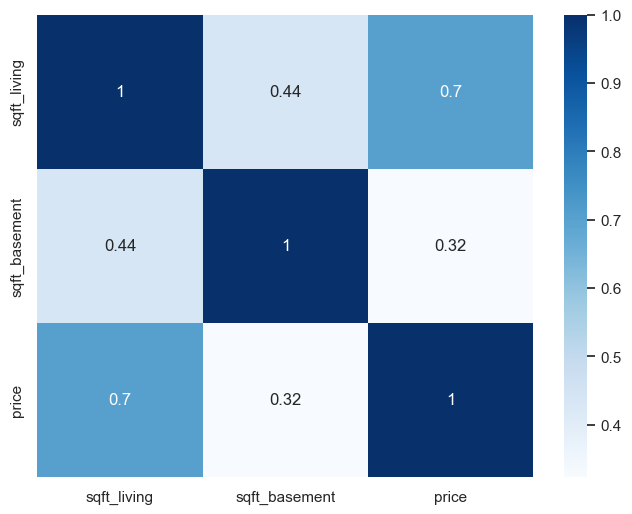

In [41]:
dfsqft = dfsqft.drop(columns=['sqft_living15', 'sqft_above'])
plt.figure(figsize=(8,6))
sns.heatmap(dfsqft.corr(), annot=True, cmap='Blues')
plt.show()

In [42]:
df.drop(columns=['sqft_lot', 'sqft_lot15','sqft_living15', 'sqft_above'], inplace=True)

In [43]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,listed_season,renovated
0,231300.0,2,1.00,1180,1.0,0,0,3,7,0,1955,98178,Fall,No
1,538000.0,3,2.25,2570,2.0,0,0,3,7,400,1951,98125,Fall,Yes
2,180000.0,2,1.00,770,1.0,0,0,3,6,0,1933,98028,Spring,No
3,604000.0,4,3.00,1960,1.0,0,0,5,7,910,1965,98136,Fall,No
4,510000.0,3,2.00,1680,1.0,0,0,3,8,0,1987,98074,Spring,No


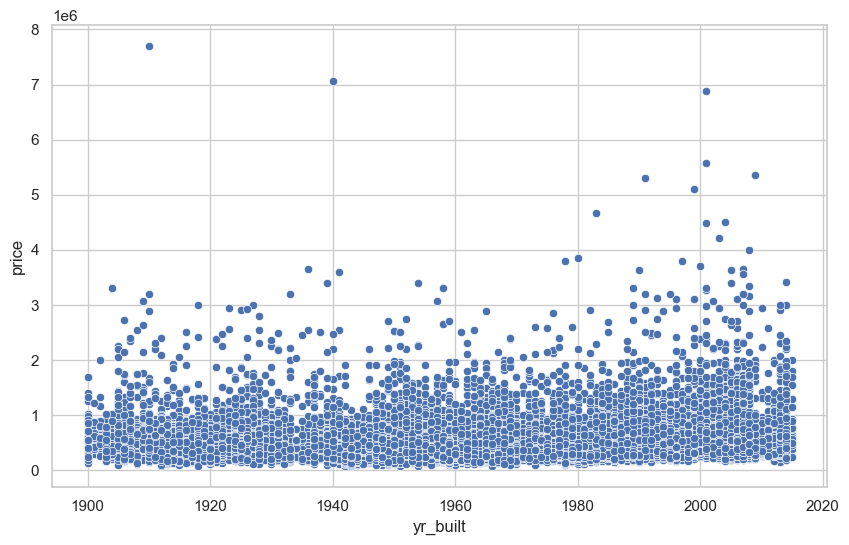

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='yr_built', y='price')
plt.show()

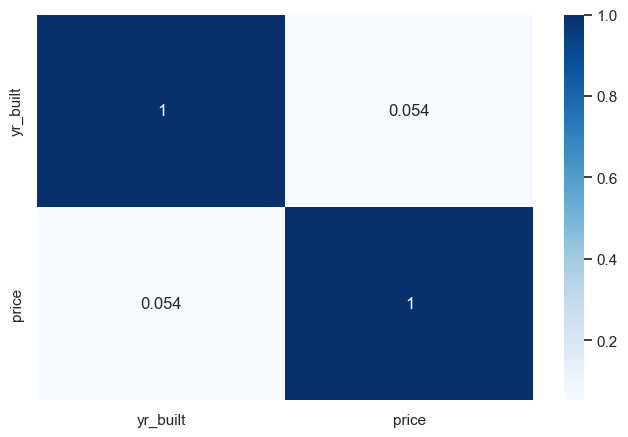

In [45]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['yr_built','price']].corr(), annot=True, cmap='Blues')
plt.show()

##### yr_built as a numeric feature does not add any significant value, mapping it to ordinal category can be valuable.

In [46]:
def property_type(year):
    if year < 1980:
        return 'Old'
    elif year < 2000:
        return 'Medium'
    else:
        return 'New'

df['property_type'] = df['yr_built'].apply(property_type)
df.drop(columns='yr_built', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
0,231300.0,2,1.00,1180,1.0,0,0,3,7,0,98178,Fall,No,Old
1,538000.0,3,2.25,2570,2.0,0,0,3,7,400,98125,Fall,Yes,Old
2,180000.0,2,1.00,770,1.0,0,0,3,6,0,98028,Spring,No,Old
3,604000.0,4,3.00,1960,1.0,0,0,5,7,910,98136,Fall,No,Old
4,510000.0,3,2.00,1680,1.0,0,0,3,8,0,98074,Spring,No,Medium


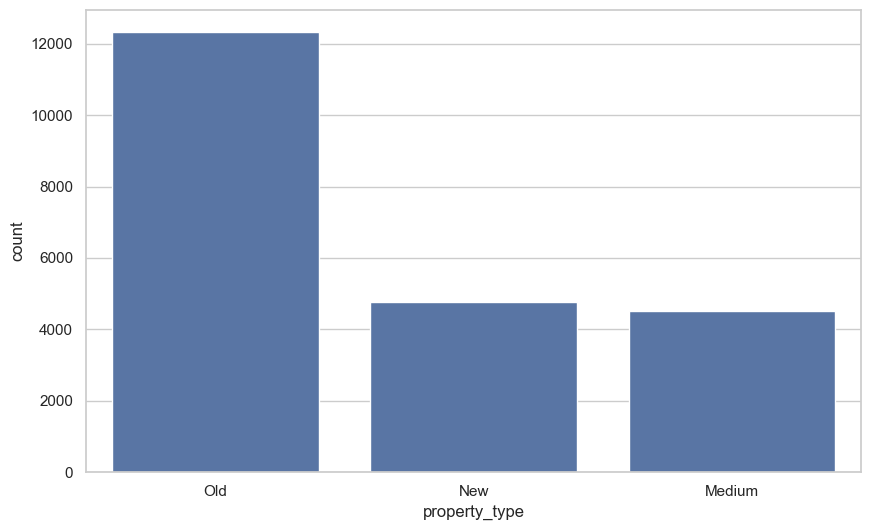

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df, x='property_type', order=df['property_type'].value_counts().index)
plt.show()

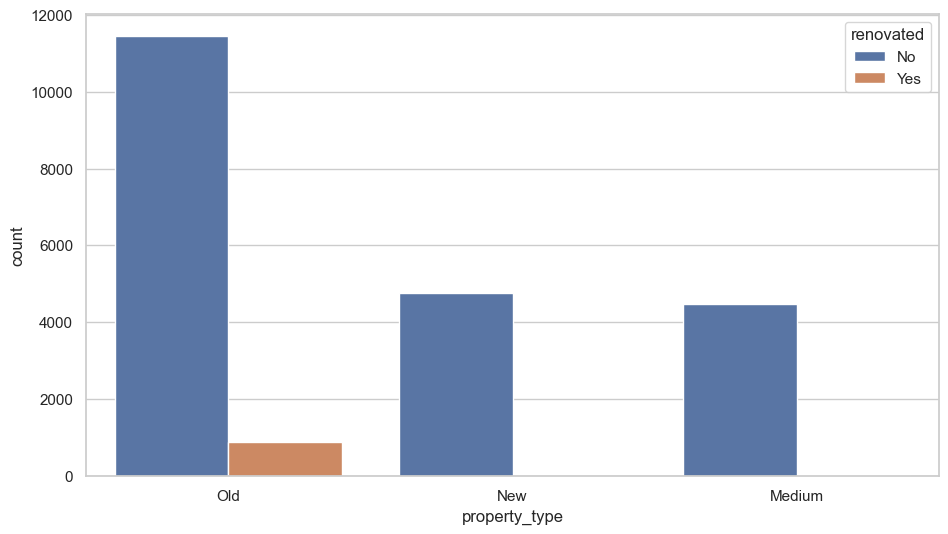

In [48]:
plt.figure(figsize=(11,6))
sns.countplot(df, x='property_type', order=df['property_type'].value_counts().index, hue='renovated')
plt.show()

In [49]:
df.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
0,231300.0,2,1.00,1180,1.0,0,0,3,7,0,98178,Fall,No,Old
1,538000.0,3,2.25,2570,2.0,0,0,3,7,400,98125,Fall,Yes,Old
2,180000.0,2,1.00,770,1.0,0,0,3,6,0,98028,Spring,No,Old
3,604000.0,4,3.00,1960,1.0,0,0,5,7,910,98136,Fall,No,Old
4,510000.0,3,2.00,1680,1.0,0,0,3,8,0,98074,Spring,No,Medium


In [50]:
dfattributes = df[['bedrooms', 'bathrooms', 'floors', 'price']]
dfattributes.head()

,bedrooms,bathrooms,floors,price
0,2,1.00,1.0,231300.0
1,3,2.25,2.0,538000.0
2,2,1.00,1.0,180000.0
3,4,3.00,1.0,604000.0
4,3,2.00,1.0,510000.0


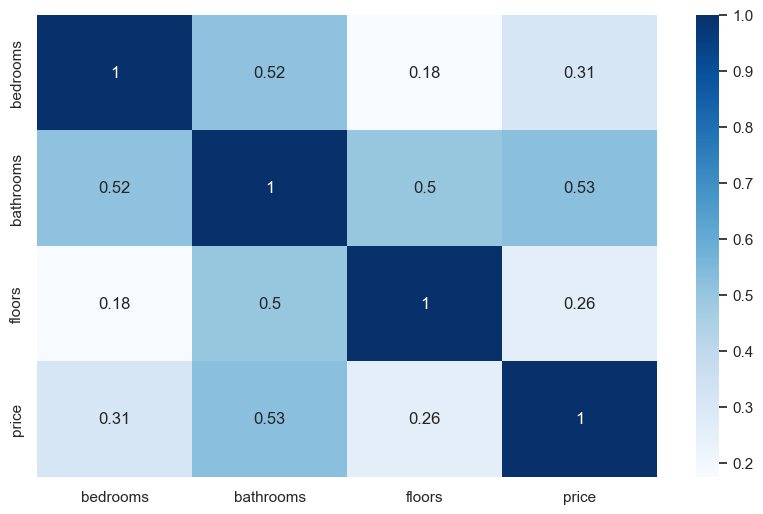

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(dfattributes.corr(), annot=True, cmap='Blues')
plt.show()

##### Bathrooms have the highest correlation with price, floors can be dropped as it has weak correlation but causes multicollinearity, bedrooms can be dropped after intial model testing if it is causing multicollinearity with bathrooms.

In [52]:
df.drop(columns='floors', inplace=True)
dfattributes = dfattributes.drop(columns=['floors','price'])
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
0,231300.0,2,1.00,1180,0,0,3,7,0,98178,Fall,No,Old
1,538000.0,3,2.25,2570,0,0,3,7,400,98125,Fall,Yes,Old
2,180000.0,2,1.00,770,0,0,3,6,0,98028,Spring,No,Old
3,604000.0,4,3.00,1960,0,0,5,7,910,98136,Fall,No,Old
4,510000.0,3,2.00,1680,0,0,3,8,0,98074,Spring,No,Medium


In [53]:
dfattributes.head()

,bedrooms,bathrooms
0,2,1.00
1,3,2.25
2,2,1.00
3,4,3.00
4,3,2.00


In [54]:
dfattributes_melted = dfattributes.melt(var_name='Columns', value_name='Values')
dfattributes_melted.head()

,Columns,Values
0,bedrooms,2.0
1,bedrooms,3.0
2,bedrooms,2.0
3,bedrooms,4.0
4,bedrooms,3.0


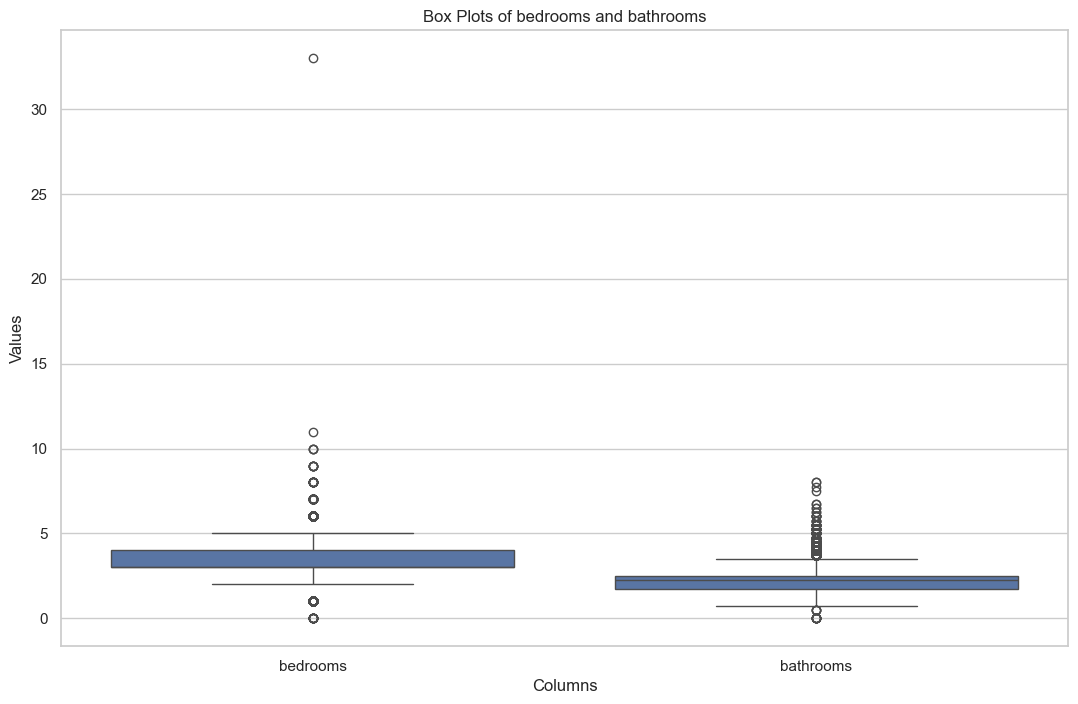

In [55]:
plt.figure(figsize=(13,8))
sns.boxplot(data=dfattributes_melted, x='Columns', y='Values')
plt.title('Box Plots of bedrooms and bathrooms')
plt.show()

In [56]:
cols = dfattributes.columns
outliers = []
outliers_p = []

for col in cols:
    Q1 = dfattributes[col].quantile(0.25)
    Q3 = dfattributes[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    rows = dfattributes[(dfattributes[col] < lower) | (dfattributes[col] > upper)]
    outliers.append(rows.shape[0])
    outliers_p.append(round((rows.shape[0] / dfattributes.shape[0]) * 100, 2))

print("done")

done


In [57]:
print(f"Outliers in bedroom: {outliers[0]}({outliers_p[0]}%)\nOutliers in bathroom: {outliers[1]}({outliers_p[1]}%)")

Outliers in bedroom: 546(2.53%)
Outliers in bathroom: 571(2.64%)


In [58]:
df['bedrooms'].value_counts()

bedrooms
3     9823
4     6882
2     2761
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [59]:
df[df['bedrooms'] == 33]

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
15870,640000.0,33,1.75,1620,0,0,5,7,580,98103,Summer,No,Old


##### Given that sqft_living is only 1620, a listing with 33 bedroom is highly unrealistic and can be concluded as a data entry error therefore can be dropped.

In [60]:
df[(df['bedrooms'] == 10) | (df['bedrooms'] == 11)]

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
8757,520000.0,11,3.00,3000,0,0,3,7,600,98106,Summer,Yes,Old
13314,1148000.0,10,5.25,4590,0,2,3,9,2090,98004,Summer,No,New
15161,650000.0,10,2.00,3610,0,0,4,7,600,98006,Fall,No,Old
19254,660000.0,10,3.00,2920,0,0,4,7,1060,98105,Fall,No,Old


##### Again given the sqft_living, listings with 10 and 11 bedrooms are highly unrealistic and can be dropped.

In [61]:
df = df[(df['bedrooms'] < 10) | (df['sqft_living'] >= 4000)].copy()

In [62]:
df.shape

(21609, 13)

In [63]:
df['bedrooms'].value_counts().sort_index()

bedrooms
0       13
1      199
2     2761
3     9823
4     6882
5     1601
6      272
7       38
8       13
9        6
10       1
Name: count, dtype: int64

##### After gathering information, it was found that on average a bedroom occupies around 200 to 300 sqft of space. Therefore, listings where the average bedroom area is less than 200 sqft are likely unrealistic. Given that, other unrealistic ratios must also be dropped.

In [64]:
df['sqft_per_bedroom'] = df['sqft_living'] / df['bedrooms']
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
0,231300.0,2,1.00,1180,0,0,3,7,0,98178,Fall,No,Old,590.000000
1,538000.0,3,2.25,2570,0,0,3,7,400,98125,Fall,Yes,Old,856.666667
2,180000.0,2,1.00,770,0,0,3,6,0,98028,Spring,No,Old,385.000000
3,604000.0,4,3.00,1960,0,0,5,7,910,98136,Fall,No,Old,490.000000
4,510000.0,3,2.00,1680,0,0,3,8,0,98074,Spring,No,Medium,560.000000


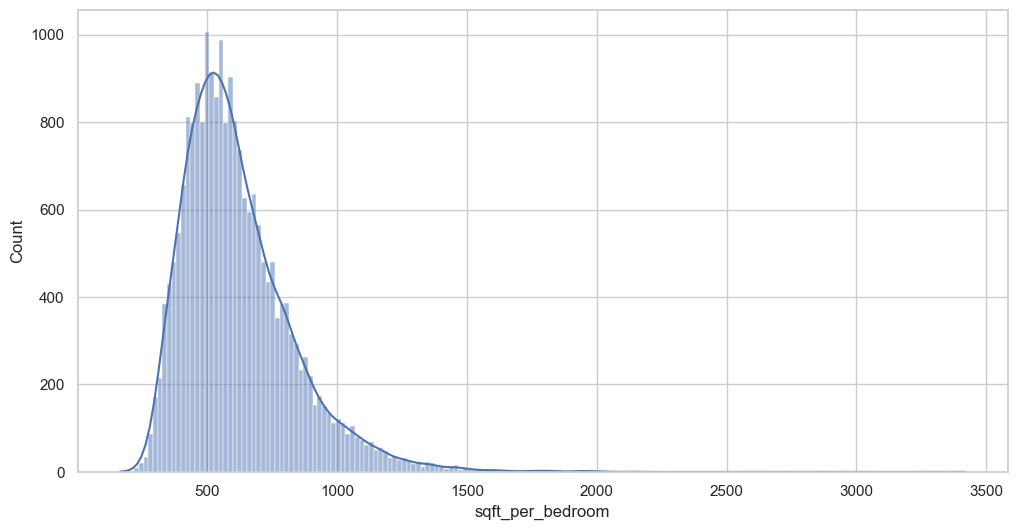

In [65]:
plt.figure(figsize=(12,6))
sns.histplot(df['sqft_per_bedroom'], kde=True)
plt.show()

In [66]:
df[df['sqft_per_bedroom'] <= 200].sort_values('bedrooms')

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
4203,150000.0,3,0.75,490,0,0,4,5,0,98014,Summer,No,Old,163.333333
319,268750.0,4,1.00,800,0,0,3,6,0,98166,Fall,No,Old,200.000000


In [67]:
df = df[df['sqft_per_bedroom'] > 200]

In [68]:
df.shape

(21607, 14)

In [69]:
df[(df['bedrooms'] == 3) & (df['sqft_per_bedroom'] < 250)]

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
5438,340000.0,3,1.00,670,0,0,4,6,0,98024,Spring,No,Old,223.333333
5885,230000.0,3,1.00,680,0,0,4,6,0,98144,Fall,No,Old,226.666667
6400,345000.0,3,1.75,710,0,0,4,6,0,98126,Fall,No,Old,236.666667
7376,295000.0,3,1.50,720,0,1,1,5,0,98126,Fall,No,Old,240.000000
11808,225000.0,3,1.00,660,0,0,4,5,0,98168,Spring,No,Old,220.000000
15697,300000.0,3,2.00,720,0,0,5,6,0,98106,Summer,No,Old,240.000000


##### These older homes (built before 1980) have compact 3-bedroom configurations ranging from 220 to 240 sqft per bedroom. While dense, such layouts are plausible for older construction norms, so the listings are retained.

##### Removing listings with unrealistic bedroom-to-space ratios. While older homes (built before 1980) with compact configurations of 220-250 sqft per bedroom were retained as historically plausible, properties exceeding physical limits will be dropped:

- 4+ bedrooms in <1200 sqft: Insufficient space for basic living areas
- 5+ bedrooms in <1800 sqft: Physically impractical configurations
- 6+ bedrooms in <2400 sqft: Clear data quality issues
- Any property <200 sqft/bedroom: Below minimum habitability standards

In [70]:
df[(df['sqft_per_bedroom'] < 280) & (df['bedrooms'] >= 4)].sort_values('bedrooms')

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
345,165000.0,4,1.00,1000,0,0,3,6,0,98178,Summer,No,Old,250.000000
14137,295000.0,4,1.00,980,0,0,4,7,0,98144,Spring,No,Old,245.000000
11705,310000.0,4,1.00,1030,0,0,3,7,0,98126,Fall,No,Old,257.500000
11670,320000.0,4,1.50,1100,0,0,4,7,0,98006,Summer,No,Old,275.000000
14449,248000.0,4,1.00,1010,0,0,4,6,0,98198,Spring,No,Old,252.500000
9974,230000.0,4,1.50,1050,0,0,4,7,0,98031,Fall,No,Old,262.500000
9149,403504.0,4,1.00,1060,0,0,3,6,110,98199,Summer,No,Old,265.000000
8416,225800.0,4,1.00,1100,0,0,4,7,220,98030,Spring,No,Old,275.000000
14649,295000.0,4,2.00,980,0,0,5,7,0,98045,Summer,No,Old,245.000000
7878,205000.0,4,1.00,1030,0,0,4,6,0,98055,Fall,No,Old,257.500000


In [71]:
df.shape

(21607, 14)

In [72]:
df = df[~((df['sqft_per_bedroom'] < 280) & (df['bedrooms'] >= 4))]
df.shape

(21558, 14)

In [73]:
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
0,231300.0,2,1.00,1180,0,0,3,7,0,98178,Fall,No,Old,590.000000
1,538000.0,3,2.25,2570,0,0,3,7,400,98125,Fall,Yes,Old,856.666667
2,180000.0,2,1.00,770,0,0,3,6,0,98028,Spring,No,Old,385.000000
3,604000.0,4,3.00,1960,0,0,5,7,910,98136,Fall,No,Old,490.000000
4,510000.0,3,2.00,1680,0,0,3,8,0,98074,Spring,No,Medium,560.000000


In [74]:
df[df['bedrooms'] == 0]

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
875,1095000.0,0,0.00,3064,0,2,3,7,0,98102,Summer,No,Medium,inf
3119,380000.0,0,0.00,1470,0,2,3,8,0,98133,Spring,No,New,inf
3467,288000.0,0,1.50,1430,0,0,3,7,0,98125,Summer,No,Medium,inf
4868,228000.0,0,1.00,390,0,0,2,4,0,98118,Fall,No,Old,inf
6994,1295650.0,0,0.00,4810,0,0,3,12,0,98053,Summer,No,Medium,inf
8477,339950.0,0,2.50,2290,0,0,3,8,0,98042,Fall,No,Medium,inf
8484,240000.0,0,2.50,1810,0,0,3,7,0,98038,Fall,No,New,inf
9773,355000.0,0,0.00,2460,0,0,3,8,0,98031,Spring,No,Medium,inf
9854,235000.0,0,0.00,1470,0,0,3,7,0,98065,Fall,No,Medium,inf
12653,320000.0,0,2.50,1490,0,0,3,7,0,98065,Spring,No,Medium,inf


##### Listing with 0 bedrooms could be counted as studios however, their sqft_living and expensive prices do not match an ideal/average stat of a studio therefore it is optimal to drop listings with 0 bedrooms as it is very likely a data entry error.

In [75]:
df = df[df['bedrooms'] != 0]
df.shape

(21545, 14)

In [76]:
df.groupby('bedrooms')['sqft_living'].mean()

bedrooms
1      884.613065
2     1239.731257
3     1806.034922
4     2560.647557
5     3065.413249
6     3324.853383
7     4029.189189
8     3800.000000
9     3775.000000
10    4590.000000
Name: sqft_living, dtype: float64

In [77]:
df.groupby('bedrooms')['sqft_living'].median()

bedrooms
1      780.0
2     1140.0
3     1680.0
4     2413.0
5     2880.0
6     2980.0
7     3410.0
8     3840.0
9     3755.0
10    4590.0
Name: sqft_living, dtype: float64

In [78]:
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type,sqft_per_bedroom
0,231300.0,2,1.00,1180,0,0,3,7,0,98178,Fall,No,Old,590.000000
1,538000.0,3,2.25,2570,0,0,3,7,400,98125,Fall,Yes,Old,856.666667
2,180000.0,2,1.00,770,0,0,3,6,0,98028,Spring,No,Old,385.000000
3,604000.0,4,3.00,1960,0,0,5,7,910,98136,Fall,No,Old,490.000000
4,510000.0,3,2.00,1680,0,0,3,8,0,98074,Spring,No,Medium,560.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21545 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21545 non-null  float64
 1   bedrooms          21545 non-null  int64  
 2   bathrooms         21545 non-null  float64
 3   sqft_living       21545 non-null  int64  
 4   waterfront        21545 non-null  int64  
 5   view              21545 non-null  int64  
 6   condition         21545 non-null  int64  
 7   grade             21545 non-null  int64  
 8   sqft_basement     21545 non-null  int64  
 9   zipcode           21545 non-null  object 
 10  listed_season     21545 non-null  object 
 11  renovated         21545 non-null  object 
 12  property_type     21545 non-null  object 
 13  sqft_per_bedroom  21545 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 2.5+ MB


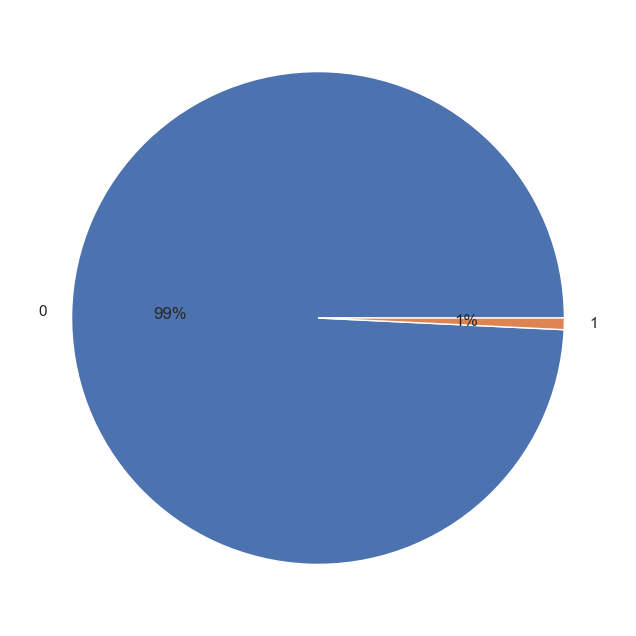

In [80]:
plt.figure(figsize=(10,8))
plt.pie(df['waterfront'].value_counts(), labels=df['waterfront'].unique(), autopct='%1.0f%%')
plt.show()

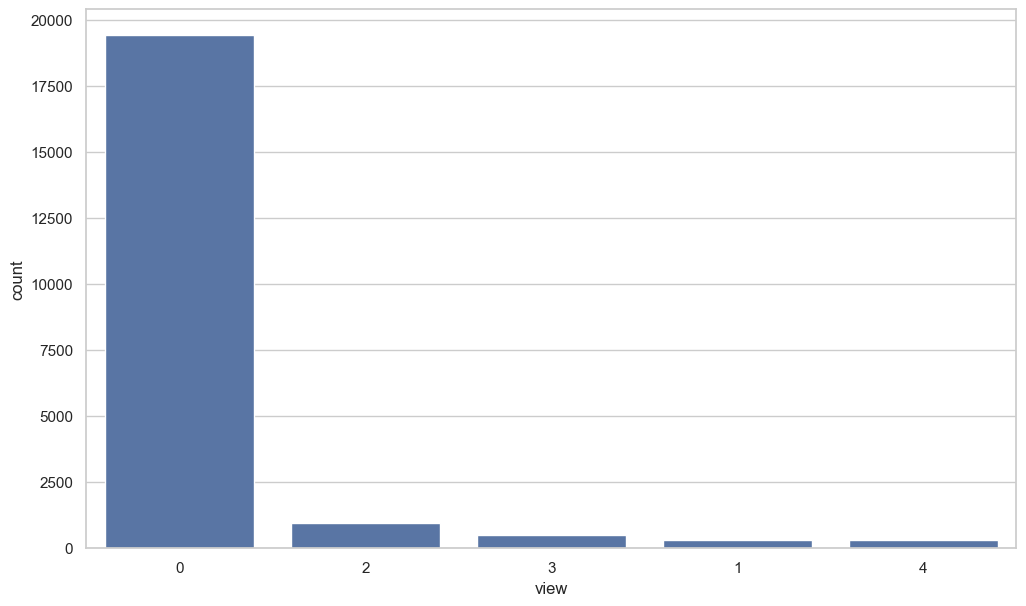

In [81]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['view'], order=df['view'].value_counts().index)
plt.show()

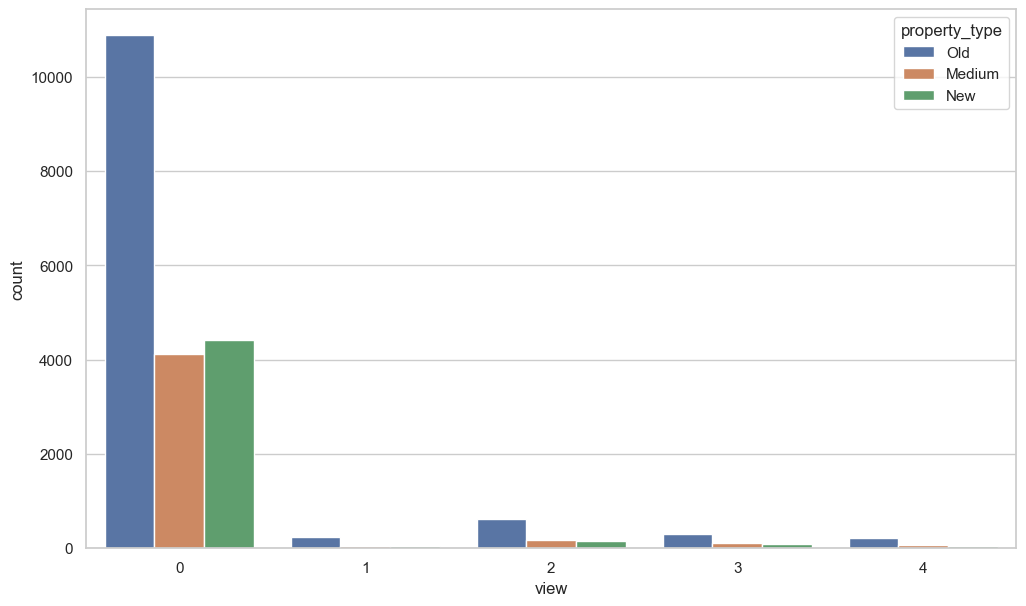

In [82]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['view'], hue=df['property_type'])
plt.show()

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21545 entries, 0 to 21612
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21545 non-null  float64
 1   bedrooms          21545 non-null  int64  
 2   bathrooms         21545 non-null  float64
 3   sqft_living       21545 non-null  int64  
 4   waterfront        21545 non-null  int64  
 5   view              21545 non-null  int64  
 6   condition         21545 non-null  int64  
 7   grade             21545 non-null  int64  
 8   sqft_basement     21545 non-null  int64  
 9   zipcode           21545 non-null  object 
 10  listed_season     21545 non-null  object 
 11  renovated         21545 non-null  object 
 12  property_type     21545 non-null  object 
 13  sqft_per_bedroom  21545 non-null  float64
dtypes: float64(3), int64(7), object(4)
memory usage: 2.5+ MB


### Data Preperation

In [84]:
df.drop(columns='sqft_per_bedroom', inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
0,231300.0,2,1.00,1180,0,0,3,7,0,98178,Fall,No,Old
1,538000.0,3,2.25,2570,0,0,3,7,400,98125,Fall,Yes,Old
2,180000.0,2,1.00,770,0,0,3,6,0,98028,Spring,No,Old
3,604000.0,4,3.00,1960,0,0,5,7,910,98136,Fall,No,Old
4,510000.0,3,2.00,1680,0,0,3,8,0,98074,Spring,No,Medium


In [85]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [86]:
df['property_type'].unique()

array(['Old', 'Medium', 'New'], dtype=object)

In [87]:
cats = df['property_type'].unique()
ordinal_encoder = OrdinalEncoder(categories=[cats]).set_output(transform='pandas')
df['property_type'] = ordinal_encoder.fit_transform(df['property_type'].values.reshape(-1,1))
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,zipcode,listed_season,renovated,property_type
0,231300.0,2,1.00,1180,0,0,3,7,0,98178,Fall,No,0.0
1,538000.0,3,2.25,2570,0,0,3,7,400,98125,Fall,Yes,0.0
2,180000.0,2,1.00,770,0,0,3,6,0,98028,Spring,No,0.0
3,604000.0,4,3.00,1960,0,0,5,7,910,98136,Fall,No,0.0
4,510000.0,3,2.00,1680,0,0,3,8,0,98074,Spring,No,1.0


In [88]:
dfohe = df[['zipcode', 'listed_season', 'renovated']]
dfohe.head()

,zipcode,listed_season,renovated
0,98178,Fall,No
1,98125,Fall,Yes
2,98028,Spring,No
3,98136,Fall,No
4,98074,Spring,No


In [89]:
ohe_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
dfohe_transformed = ohe_encoder.fit_transform(dfohe)
dfohe_transformed.head()

,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [90]:
df = pd.concat([df, dfohe_transformed], axis=1).drop(columns=dfohe)
df.head()

,price,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,property_type,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
0,231300.0,2,1.00,1180,0,0,3,7,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,538000.0,3,2.25,2570,0,0,3,7,400,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,180000.0,2,1.00,770,0,0,3,6,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,604000.0,4,3.00,1960,0,0,5,7,910,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,510000.0,3,2.00,1680,0,0,3,8,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [92]:
X = df.iloc[:,1:]
y = df['price']

In [93]:
X.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement,property_type,zipcode_98002,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
0,2,1.00,1180,0,0,3,7,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,0,0,3,7,400,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.00,770,0,0,3,6,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,3.00,1960,0,0,5,7,910,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,0,0,3,8,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [94]:
y.head()

0    231300.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [95]:
temp = X.iloc[:,0:8]
temp.head()

,bedrooms,bathrooms,sqft_living,waterfront,view,condition,grade,sqft_basement
0,2,1.00,1180,0,0,3,7,0
1,3,2.25,2570,0,0,3,7,400
2,2,1.00,770,0,0,3,6,0
3,4,3.00,1960,0,0,5,7,910
4,3,2.00,1680,0,0,3,8,0


In [96]:
tempcol = temp[['waterfront']]
temp.drop(columns=['waterfront'], inplace=True)
temp = pd.concat([temp, tempcol], axis=1)
temp.head()

,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_basement,waterfront
0,2,1.00,1180,0,3,7,0,0
1,3,2.25,2570,0,3,7,400,0
2,2,1.00,770,0,3,6,0,0
3,4,3.00,1960,0,5,7,910,0
4,3,2.00,1680,0,3,8,0,0


In [97]:
cols = temp.columns
X.drop(columns=cols, inplace=True)
X = pd.concat([temp,X], axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_basement,waterfront,property_type,zipcode_98002,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
0,2,1.00,1180,0,3,7,0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,0,3,7,400,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.00,770,0,3,6,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,3.00,1960,0,5,7,910,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,0,3,8,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [98]:
to_float = X.iloc[:,:7]

for col in to_float.columns:
    X[col] = X[col].astype(float)

print("done")

done


In [99]:
X.head()

,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_basement,waterfront,property_type,zipcode_98002,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
0,2.0,1.00,1180.0,0.0,3.0,7.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.25,2570.0,0.0,3.0,7.0,400.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,1.00,770.0,0.0,3.0,6.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,3.00,1960.0,0.0,5.0,7.0,910.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,2.00,1680.0,0.0,3.0,8.0,0.0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [100]:
X.iloc[:,:7].info()

<class 'pandas.core.frame.DataFrame'>
Index: 21545 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21545 non-null  float64
 1   bathrooms      21545 non-null  float64
 2   sqft_living    21545 non-null  float64
 3   view           21545 non-null  float64
 4   condition      21545 non-null  float64
 5   grade          21545 non-null  float64
 6   sqft_basement  21545 non-null  float64
dtypes: float64(7)
memory usage: 1.3 MB


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train.iloc[:,:7] = scaler.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:, :7] = scaler.transform(X_test.iloc[:, :7])
X_train.head()

,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_basement,waterfront,property_type,zipcode_98002,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
205,0.375,0.21875,0.160213,0.0,0.75,0.6,0.205811,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10192,0.250,0.18750,0.104784,0.0,0.75,0.4,0.169492,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17286,0.500,0.31250,0.181473,0.0,0.75,0.5,0.280872,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7725,0.000,0.28125,0.134396,0.0,0.50,0.4,0.162228,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14693,0.375,0.31250,0.112377,0.0,0.50,0.5,0.000000,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
X_train.head()

,bedrooms,bathrooms,sqft_living,view,condition,grade,sqft_basement,waterfront,property_type,zipcode_98002,...,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,listed_season_Spring,listed_season_Summer,renovated_Yes
205,0.375,0.21875,0.160213,0.0,0.75,0.6,0.205811,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10192,0.250,0.18750,0.104784,0.0,0.75,0.4,0.169492,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
17286,0.500,0.31250,0.181473,0.0,0.75,0.5,0.280872,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7725,0.000,0.28125,0.134396,0.0,0.50,0.4,0.162228,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14693,0.375,0.31250,0.112377,0.0,0.50,0.5,0.000000,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
